# Capstone 2 Exploratory Data Analysis

## Table of Contents<a id='Table_of_Contents'></a>
* [2 Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [2.1 Imports](#Imports)
        * [2.1.1 Import Libraries](#Import_Libraries)
        * [2.1.2 Import Data](#Import_Data)          
    
    * [2.2 Visualizing Churn Across Features](#Visualizing_Churn_Across_Features)
        * [2.2.1 Categorical Features](#Categorical_Features)
        * [2.2.2 Numerical Features](#Numerical_Features)
        * [2.2.3 Churn, Auto-Renew, and Price](#Churn_Auto-Renew_and_Price)
        * [2.2.4 Churn by Registration Date](#Churn_by_Registration_Date)
    

## 2.1 Imports<a id='Imports'></a>

### 2.1.1 Import Libraries<a id='Import_Libraries'></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### 2.1.2 Import Data<a id='Import_Data'></a>

In [18]:
data = pd.read_csv("../data/processed/combined.csv")

In [19]:
data = data.drop("Unnamed: 0", axis=1)

In [21]:
data.shape

(599990, 23)

In [82]:
data.head()

,msno,transaction_date,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,membership_expire_date,is_cancel,...,registered_via,registration_init_time,total_days,total_num_25,total_num_50,total_num_75,total_num_985,total_num_100,total_num_unique,total_secs
0,++6xEqu4JANaRY4GjEfEFtLtqOvZvYPyP3uk/PW9Ces=,20170331,0,41,30,99,99,1,20170430,0,...,7,20160501,9,18,3,0,2,38,53,9541.349
1,++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,20170331,0,39,30,149,149,1,20170524,0,...,3,20120603,21,62,15,5,7,205,172,57832.941
2,++A8p4GrsTnMjI6hAZEtlRsaz6s6O9ddUoH0fmS4s7s=,20170326,0,30,30,149,149,1,20170426,0,...,9,20141118,28,46,13,12,14,395,437,104319.610
3,++EcAZQCSSJQMx37/+/QqjiVQq3cS/hGug6JlzCufig=,20170331,0,39,30,149,149,1,20170518,0,...,9,20110205,25,77,35,29,17,440,339,115120.269
4,++Ve6PtJ8HDzBYbkuwGkmNrXdOk7ZLfTATtE6G/mX/U=,20170331,0,34,30,149,149,1,20170430,0,...,9,20080323,4,64,9,10,5,58,137,20449.617


## 2.2 Visualizing Churn Across Features<a id="Visualizing_Churn_Across_Features"></a>

### 2.2.1 Categorical Features<a id="Categorical_Features"></a>

Let's explore the percentage of subscribers that churn for each value in the categorical features. 

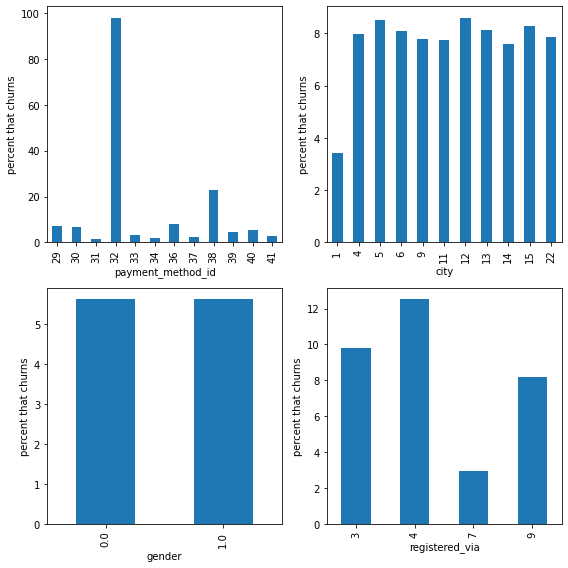

In [78]:
cat_features = ["payment_method_id", "city", "gender", "registered_via"]
fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.flatten()
for i, feature in enumerate(cat_features): 
    churn_pct_by_feature = (data.groupby(by=feature).is_churn.sum() / data[feature].value_counts())*100
    churn_pct_by_feature.plot(kind="bar", ax=axs[i], xlabel=feature, ylabel="percent that churns")

plt.tight_layout()
plt.show();

Insights:
* Almost 100% of the subscribers who payed with payment method id 32 churned
* Subscribers from city 1 (which is also the most populous) are the least likely to churn
* There is no correlation between gender and likelyhood of churning
* Registration method 7 is the best at retaining subscribers - less than 4% of the subscribers who registered with method 7 churned, while over 8% of subscribers churned with the other methods 

### 2.2.2 Numerical Features<a id="Numerical_Features"></a>

Are subscribers who spend more time on the app more likely to renew or churn? 

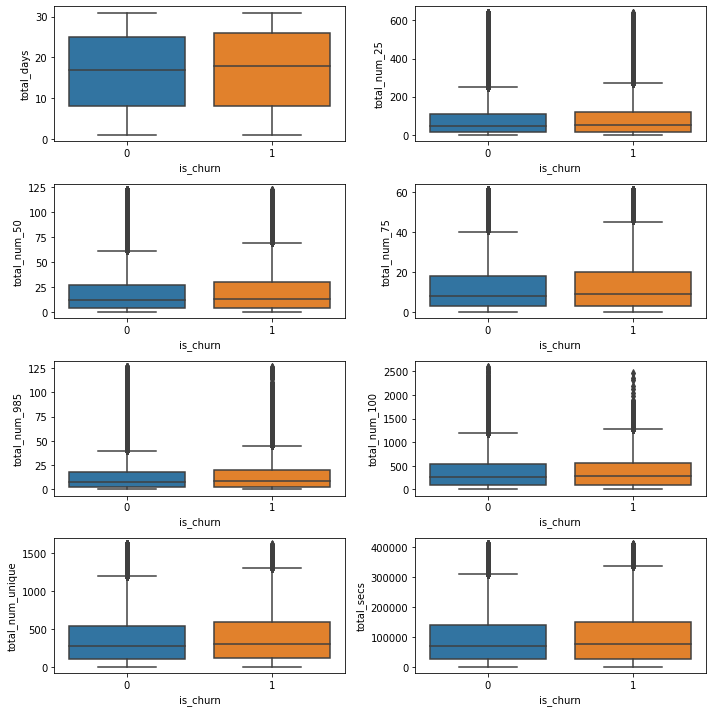

In [94]:
num_features = ["total_days", "total_num_25", "total_num_50", "total_num_75", 
                "total_num_985", "total_num_100", "total_num_unique", "total_secs"]

fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs = axs.flatten()
for i, feature in enumerate(num_features): 
    sns.boxplot(x="is_churn", y=feature, data=data, ax=axs[i])

plt.tight_layout()
plt.show();

Insights:

Listening behavior has very little to do with whether or not a subscriber churns. Subscribers that churn and subscribers that renew use the service at the same rates. 

### 2.2.3 Churn, Auto-Renew, and Price<a id="Churn_Auto-Renew_and_Price"></a>

Are customers who sign up for auto-renew more or less likely to churn? How does plan price and amount paid affect that decision? 

In [135]:
# Get the counts 
top_left = format(sum((data.is_auto_renew==0) & (data.is_churn==0)), (",d"))
top_right = format(sum((data.is_auto_renew==1) & (data.is_churn==0)), (",d"))
bottom_left = format(sum((data.is_auto_renew==0) & (data.is_churn==1)), (",d"))
bottom_right = format(sum((data.is_auto_renew==1).sum() & (data.is_churn==1)), (",d"))

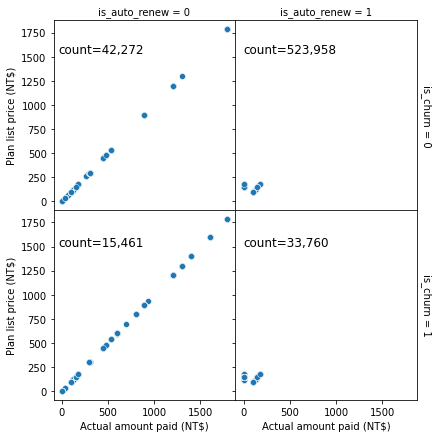

In [139]:
g = sns.FacetGrid(data=data, col="is_auto_renew", row="is_churn", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="actual_amount_paid", y="plan_list_price")
g.set_axis_labels("Actual amount paid (NT$)", "Plan list price (NT$)")

# add counts to FacetGrid
plt.text(0,1500,"count="+bottom_right, size=12)
plt.text(-2000,1500,"count="+bottom_left, size=12)
plt.text(-2000,3500,"count="+top_left, size=12)
plt.text(0,3500,"count="+top_right, size=12)
g.fig.subplots_adjust(wspace=0, hspace=0);

Insights:   

* The first thing that stands out is that subscribers who did not sign up for auto-renew paid higher prices for the service. This is most likely because they paid for plans lasting several months or a year, while those who signed up for auto-renew chose to pay on a month-to-month basis.   
* Of the subscribers who churned (bottom panels), more than double signed up for auto-renew than did not. 
    * It is tempting to conclude that the auto-renew option is ineffective at retaining subscribers, but this is not necessarily true. Those subscribers might have churned regardless. We would need to compare the retention rate over time in order to determine more conclusively how auto-renew affects churn. 
* All the subscribers that did not sign up for auto-renew paid the listed price, while some of the customers who signed up for auto-renew paid less than the listed price. 
    * There appears to have been a promotion where subscribers who signed up for auto-renew got a discount. Was this promotion effective? Let's get the exact numbers of subscribers who got a discount, and count how many churned.

In [98]:
discount = data[data.actual_amount_paid < data.plan_list_price]
discount.shape

(634, 23)

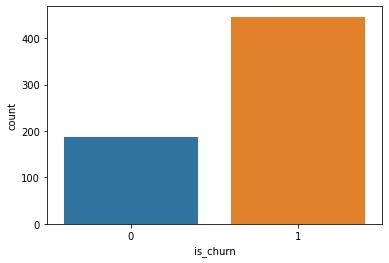

In [208]:
sns.countplot(data=discount, x="is_churn");

So in March 2017, more subscribers who got a discount churned than renewed. However, this does not mean that discounts are ineffective at preventing churn. Like the auto-renew option, we should compare the retention rate over several months before determining if discounts help retain customers. 

### 2.2.4 Churn by Registration Date<a id="Churn_by_Registration_Date"></a>

Our churn data is from March 2017. Let's take a look at the registration date of customers who did not renew the service that month. 

In [209]:
churn_by_reg = pd.DataFrame(data.groupby(by="registration_init_time").is_churn.sum())
churn_by_reg = churn_by_reg.sort_index().reset_index()
churn_by_reg = churn_by_reg.rename({"is_churn":"total_churn"}, axis=1)

In [210]:
churn_by_reg["registration_init_time"] = pd.to_datetime(churn_by_reg["registration_init_time"]
                                                       .astype(str), format="%Y%m%d")

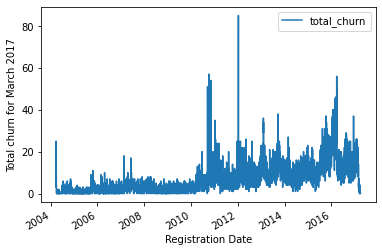

In [211]:
churn_by_reg.set_index("registration_init_time").plot()
plt.xlabel("Registration Date")
plt.ylabel("Total churn for March 2017")
plt.show();

Insights: 

There is a large group of subscribers who registered in 2012 that churned in March 2017. 

In [215]:
spikes = churn_by_reg[churn_by_reg["total_churn"] > 40]
spikes

,registration_init_time,total_churn
2357,2010-09-17,51
2363,2010-09-23,41
2382,2010-10-12,57
2411,2010-11-10,41
2413,2010-11-12,54
2839,2012-01-12,85
4351,2016-03-03,45
4355,2016-03-07,46
4360,2016-03-12,43
4367,2016-03-19,46


In [ ]:
# Use a regular expression to isolate users who registered in 2012, and see what info you can find. 
# try to find out what cause that major spike. 
# One theory is that it is college students who cancelled a special college plan. If the ages are 
# college ages, that could be validated. 

### 2.2.5 Churn by Age<a id="Churn_by_Age"></a>

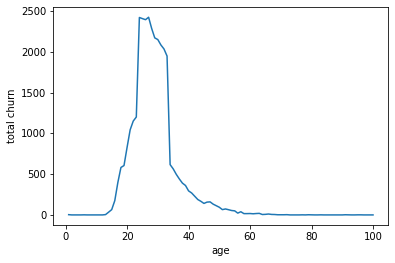

In [206]:
churn_by_age = data.groupby("age").is_churn.sum()
churn_by_age.plot(ylabel="total churn");

Insights:

Most of the customers that churned were 20 to 40 years old. However, this does not tell us much, as most of the population is in the 20-40 age group.

In the Data Wrangling step, we replaced about 300,000 missing age values with values between 24 and 34, which was the 25th percentile and 75th percentile respectively of the data that was available.

Age alone should not be used as an indicator of whether or not a user will churn. 

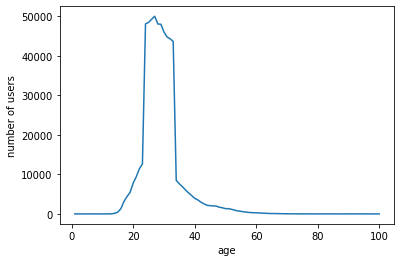

In [207]:
pop_by_age = data.copy()
pop_by_age["ones"] = 1
pop_by_age.groupby("age").ones.count().plot(ylabel="number of users");

In [83]:
data.columns

Index(['msno', 'transaction_date', 'is_churn', 'payment_method_id',
       'payment_plan_days', 'plan_list_price', 'actual_amount_paid',
       'is_auto_renew', 'membership_expire_date', 'is_cancel', 'city', 'age',
       'gender', 'registered_via', 'registration_init_time', 'total_days',
       'total_num_25', 'total_num_50', 'total_num_75', 'total_num_985',
       'total_num_100', 'total_num_unique', 'total_secs'],
      dtype='object')